Thinking1:既然内容相似度计算简单，能频繁更新，为什么还需要协同过滤算法呢？

A1:内容相似度忽视了用户行为，从而也忽视了物品的流行度以及用户行为中所包含的规律，所以它的精度比较低，但结果的新颖度却比较高。（https://zhuanlan.zhihu.com/p/46511012）

Thinking2:你需要推荐系统么？哪些情况下不需要推荐系统？

A2:
推荐系统的任务就是联系用户和信息，一方面帮助用户发现对自己有价值的信息，另一方面让信息能够展现在对它感兴趣的用户面前，从而实现信息消费者和信息生产者的双赢
第一，看看产品的目的。如果一款产品的目的是建立越多连接越好，那么它最终需要一个推荐系统。有哪些产品的目的不是建立连接呢？一种典型的产品就是工具类，如果是单纯提高人类某些工作的效率而存在的产品，比如一个视频编辑器，则不需要。虽然如今很多产品都从工具切入最后做成社区了，至少在工具属性很强时不需要推荐系统。

第二，看看产品现有的连接。如果你的产品中物品很少，少到用人工就可以应付过来，那么用户产生的连接肯定不多，因为连接数量的瓶颈在于物品的数量，这时候不适合搭建推荐系统。或者用户和物品数量在某些手段下也变得很多，但是用户和物品之间的连接很少，表现就是用户的留存回访很低，这时候也不是很需要一个推荐系统。
（https://baijiahao.baidu.com/s?id=1595160924062851747&wfr=spider&for=pc）

Thinking3:如果给一个视频打标签，视频中有音乐作为背景音乐，采用了NLP方式对内容自动打标签，可能存在什么问题？		

A3:视频内容所属标签和BGM打上的标签不相近
一个视频可能会打上多个标签不适用于一对多分类的情况

In [1]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

sklearn有关于decision tree的指导

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier 

In [2]:
# 加载数据
digits = load_digits()
data = digits.data
# 数据探索
print(data.shape)
# 查看第一幅图像
print(digits.images[0])

(1797, 64)
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [3]:
# 第一幅图像代表的数字含义
print(digits.target[0])

0


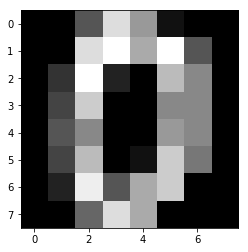

In [4]:
# 将第一幅图像显示出来
plt.gray()
plt.imshow(digits.images[0])
plt.show()

In [5]:
# 分割数据，将25%的数据作为测试集，其余作为训练集
train_x, test_x, train_y, test_y = train_test_split(data, digits.target, test_size=0.25, random_state=36)

In [6]:
#决策树模型不需要归一化
#使用默认参数
clf = DecisionTreeClassifier(criterion='entropy',random_state=13)
clf.fit(train_x, train_y)
predict_y=clf.predict(test_x)

print('CART准确率: %0.4lf' % accuracy_score(predict_y, test_y))

CART准确率: 0.8644
